In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
x1 = []
y1 = []

x2 = []
y2 = []
s = []

for i in range(5000):
    x1.append(np.random.normal(0, 0.5))
    y1.append(np.random.normal(2, 0.5))
    
    x2.append(np.random.normal(3, 0.5))
    y2.append(np.random.normal(2, 0.5))
    
    s.append(1)

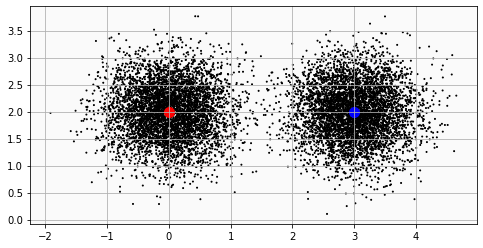

In [5]:
plt.figure(figsize=(8,4)) # Set the figure size

ax = plt.scatter(x1,y1, color = 'black', s = s)
ax = plt.gca()
plt.scatter(x2,y2, color = 'black', s = s)
plt.scatter(0,2, color = 'red', s = 100)
plt.scatter(3,2, color = 'blue', s = 100)
ax.set_facecolor((250/255, 250/255,250/255))
ax.grid('on')

In [4]:
import seaborn as sns

In [5]:
x = []

for i in range(100):
    x.append(np.random.normal(50, 2.5))

In [6]:
N=100
mu, sigma = 10000, 2000
mu2, sigma2 = 0, 500
X1 = np.random.normal(mu, sigma, N)
X2 = np.random.normal(mu2, sigma2, N)
X = np.concatenate([X1, X2])

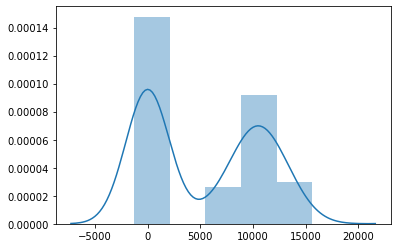

In [7]:
sns.distplot(X)

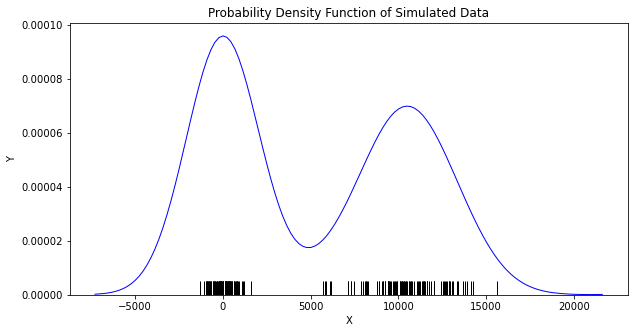

In [8]:
plt.figure(figsize=(10,5)) # Set the figure size
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Probability Density Function of Simulated Data')
sns.distplot(X, hist = False, kde = True, rug = True,
             color = 'blue', 
             kde_kws={'linewidth': 1},
             rug_kws={'color': 'black'})

# Plot formatting


In [9]:
N=100
mu2, sigma2 = 0, 1
X2 = np.random.normal(mu2, sigma2, N)


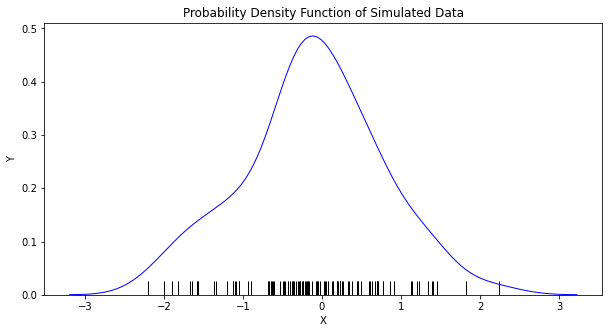

In [10]:
plt.figure(figsize=(10,5)) # Set the figure size
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Probability Density Function of Simulated Data')
sns.distplot(X2, hist = False, kde = True, rug = True,
             color = 'blue', 
             kde_kws={'linewidth': 1},
             rug_kws={'color': 'black'})

n = 1, k = 1
n = 4, k = 2
n = 25, k = 5
n = 49, k = 7


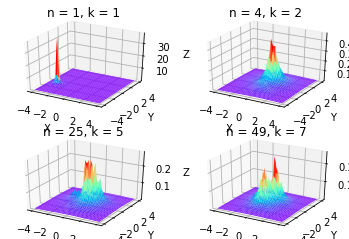

<Figure size 720x720 with 0 Axes>

<class 'numpy.ndarray'>


In [11]:
import math
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


MU = np.zeros(2)
COV = np.eye(2)

def getData(size):
    data = np.random.multivariate_normal(MU, COV, size)
    return data

def area(data):
    size = 40
    X = []
    for i in range(data.shape[1]):
        x=np.linspace(-4, 4, size)
        X.append(x)
    return np.array(X)

def knn(data, k):
    X = area(data)
    size = [len(X[0]), len(X[1])]
    knnpdf = np.zeros(size)
    for i in range(size[0]):
        for j in range(size[1]):
            x = np.array([X[0][i],X[1][j]])
            ds = [np.linalg.norm(x-y) for y in data]
            ds.sort()
            v = math.pi*ds[k-1]*ds[k-1]
            if v == 0:
                knnpdf[i,j] = 1
            else:
                knnpdf[i,j] = k/(n*v)
    return X, knnpdf
  
n_set = [1, 4, 25, 49]
fig = plt.figure()
plt.figure(figsize=(10,10))
pos = 1

for n in n_set :
    k = int(math.sqrt(n))
    s = "n = %d, k = %d" % (n, k)
    print(s)
    data = getData(n)
    X,P = knn(data, k)
    ax = fig.add_subplot(len(n_set)/2, 2, pos, projection='3d')
    pos = pos + 1
    px, py = np.meshgrid(X[0], X[1])
    ax.plot_surface(px, py, P, cmap='rainbow')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    ax.set_title(s)
        
plt.show()

data = getData(3)
print(type(data))

In [12]:
data1 = getData(100)
data2 = pd.DataFrame(data=data1, columns=["x", "y"])
data2.head()

,x,y
0,0.490336,-0.496062
1,-0.698202,1.515498
2,-0.186245,0.706177
3,1.387940,-1.688530
4,-1.424528,-0.416826


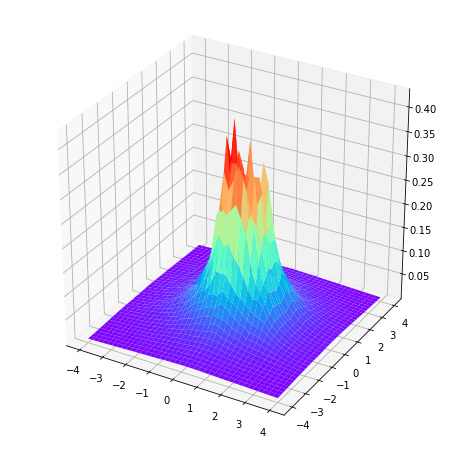

In [13]:
# data = pd.read_excel('mode2.xlsx')
# data = data.to_numpy()
data1 = getData(100)
k = 16

X,P = knn(data1, k)
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
px, py = np.meshgrid(X[0], X[1])
ax.plot_surface(px, py, P, cmap='rainbow',linewidth=0)
plt.show()

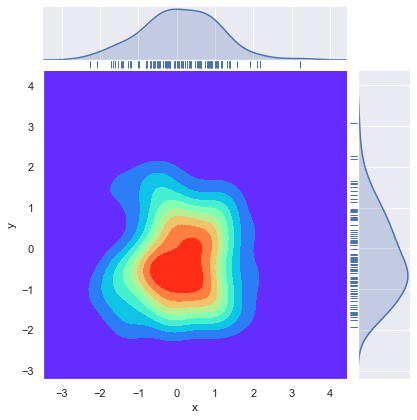

In [14]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.jointplot(x='x',y='y',data=data2,cmap='rainbow',kind='kde').plot_marginals(sns.rugplot, height=-.15, clip_on=False)